In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import functools as ft

In [118]:
filename = r'C:\Users\leoma\Notebooks\TP2019\pesajes_nulos.csv'
pesajes = pd.read_csv(filename, delimiter=';', decimal='.')

In [119]:
## AHORA TODOS SON FLOTANTES (este bloque despues borrarlo)

for i in range(0,11):
    print(type(pesajes.iloc[0,i]))

<class 'str'>
<class 'str'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>


In [367]:
pesajes.head(3)

,PUNTO,COMUNA,ANIO,MES,SEMANA,VIDRIO,PAPEL_Y_CARTON,METAL,TELGOPOR,PLASTICOS_TODOS_LOS_DEMAS,TETRA_BRICK
0,PARQUE AVELLANEDA,9,2015,1,1,163.23,123.67,27.55,0.00,67.17,8.54
1,PARQUE AVELLANEDA,9,2015,1,2,143.71,138.21,7.91,0.00,67.31,8.54
2,PARQUE AVELLANEDA,9,2015,1,3,134.47,154.43,7.24,1.42,75.35,8.54


In [366]:
filename = r'C:\Users\leoma\Desktop\UTN\Ciencia de Datos\DataSets\TP2019\puntos-verdes.csv'
puntos_verdes = pd.read_csv(filename, delimiter=',')
puntos_verdes.head(3)

,long,lat,id,plaza,tipo,tipo_norma,materiales,dias_y_horario,cooperativa,calle,altura,calle2,direccion,barrio,comuna,observaciones
0,-58.465309,-34.567226,1,Plaza Castelli,Punto Verde Con Atención,punto_verde_con_atencion,Papel / Cartón / Vidrio / Metal / Plástico / T...,Miércoles a Domingos de 11 a 19hs.,Amanecer,Conde,0,Juramento,CONDE y JURAMENTO,Belgrano,Comuna 13,"Para entregar los materiales, éstos deben esta..."
1,-58.424945,-34.589219,2,Plaza Armenia,Punto Verde Con Atención,punto_verde_con_atencion,Papel / Cartón / Vidrio / Metal / Plástico / T...,Miércoles a Domingos de 11 a 19hs.,Ceibo,Malabia,0,Costa Rica,MALABIA y COSTA RICA,Palermo,Comuna 14,"Para entregar los materiales, éstos deben esta..."
2,-58.468392,-34.547087,3,Plaza Balcarce,Punto Verde Con Atención,punto_verde_con_atencion,Papel / Cartón / Vidrio / Metal / Plástico / T...,Miércoles a Domingos de 11 a 19hs.,Madreselva,Manzanares,0,Vuelta de Obligado,MANZANARES y VUELTA DE OBLIGADO,Nuñez,Comuna 13,"Para entregar los materiales, éstos deben esta..."


In [140]:
puntos_verdes = puntos_verdes.iloc[:,[0,1,14]]
puntos_verdes = puntos_verdes.dropna()
puntos_verdes.drop_duplicates().isnull().sum()

long      0
lat       0
comuna    0
dtype: int64

In [143]:
# Traducimos las comunas a solamente un numero y mergeamos los Dataframes

comunas_distintas_puntosVerdes = ['Comuna 1', 'Comuna 2', 'Comuna 3', 'Comuna 4', 'Comuna 5', 'Comuna 6', 'Comuna 7',
                                  'Comuna 8', 'Comuna 9', 'Comuna 10', 'Comuna 11', 'Comuna 12', 'Comuna 13', 'Comuna 14', 'Comuna 15']

comunas_distintas_Pesajes = ['COMUNA 1', 'COMUNA 2', 'COMUNA 3', 'COMUNA 4', 'COMUNA 5', 'COMUNA 6', 'COMUNA 7','COMUNA 8',
                             'COMUNA 9', 'COMUNA 10', 'COMUNA 11', 'COMUNA 12', 'COMUNA 13', 'COMUNA 14', 'COMUNA 15']
for i in range (1,16):
    puntos_verdes.loc[ puntos_verdes['comuna'] == comunas_distintas_puntosVerdes[i-1], 'comuna'] = i
    pesajes.loc[ pesajes['COMUNA'] == comunas_distintas_Pesajes[i-1], 'COMUNA'] = i

In [ ]:
# Centro los puntos puntos_verdes en cada comuna
centros_puntos_verdes = puntos_verdes.groupby('comuna', as_index=False).agg('mean')

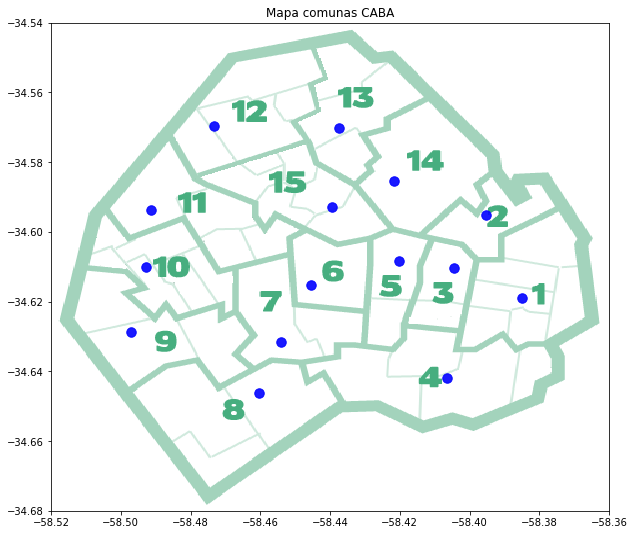

In [365]:
#Reacoomodo las coordenadas para que queden bien ubicadas en el mapa
centros_puntos_verdes.iloc[0,1] -= 0.01 # Longitud COMUNA 1 Si le resto va a la izq
centros_puntos_verdes.iloc[0,2] -= 0.01 # Latitud COMUNA 1 Si le resto baja
centros_puntos_verdes.iloc[1,1] += 0.003;centros_puntos_verdes.iloc[1,2] -= 0.005 # COMUNA 2
centros_puntos_verdes.iloc[2,1] -= 0.002;centros_puntos_verdes.iloc[2,2] += 0.005 # COMUNA 3
centros_puntos_verdes.iloc[3,1] -= 0.016 # COMUNA 4
centros_puntos_verdes.iloc[4,1] -= 0.004;centros_puntos_verdes.iloc[4,2] += 0.01 # COMUNA 5
centros_puntos_verdes.iloc[5,1] -= 0.004;centros_puntos_verdes.iloc[5,2] -= 0.001 # COMUNA 6
centros_puntos_verdes.iloc[7,1] += 0.004;centros_puntos_verdes.iloc[7,2] += 0.03 # COMUNA 8
centros_puntos_verdes.iloc[8,1] += 0.007;centros_puntos_verdes.iloc[8,2] += 0.018 # COMUNA 9
centros_puntos_verdes.iloc[9,1] += 0.007;centros_puntos_verdes.iloc[9,2] += 0.017 # COMUNA 10
centros_puntos_verdes.iloc[10,1] += 0.001;centros_puntos_verdes.iloc[10,2] += 0.01 # COMUNA 11
centros_puntos_verdes.iloc[11,1] += 0.015 # COMUNA 12
centros_puntos_verdes.iloc[12,1] += 0.015;centros_puntos_verdes.iloc[12,2] -= 0.01 # COMUNA 13
centros_puntos_verdes.iloc[13,2] -= 0.005 # COMUNA 14
centros_puntos_verdes.iloc[14,1] += 0.022 # COMUNA 15

BBox = (-58.52,-58.36,-34.68,-34.54)

mapa = plt.imread(r'C:\Users\leoma\Desktop\UTN\Ciencia de Datos\DataSets\TP2019\map - copia.png')

fig, ax = plt.subplots(figsize = (10,15))
ax.scatter(centros_puntos_verdes.long, centros_puntos_verdes.lat, zorder=1, alpha= 0.9, c='b', s=90)
ax.set_title('Mapa comunas CABA')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(mapa, zorder=0, extent = BBox, aspect= 'equal')